## 1. Dataset Description
The Boston Housing Dataset is a classic dataset in machine learning used for regression tasks. It contains 506 observations and 14 features, including information about housing prices in various neighborhoods of Boston.

- Target Variable: MEDV (Median value of owner-occupied homes in $1000s).
- Feature Variables:
 - CRIM: Per capita crime rate by town.
 - ZN: Proportion of residential land zoned for large lots.
 - INDUS: Proportion of non-retail business acres per town.
 - CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
 - NOX: Nitrogen oxide concentration (air pollution).
 - RM: Average number of rooms per dwelling.
 - AGE: Proportion of owner-occupied units built before 1940.
 - DIS: Weighted distances to employment centers.
 - RAD: Index of accessibility to highways.
 - TAX: Property tax rate per $10,000.
 - PTRATIO: Pupil-teacher ratio by town.
 - B: Proportion of Black population.
 - LSTAT: % lower status of the population.

## 2. Purpose of Using This Dataset
We will use Linear Regression to predict house prices (MEDV) based on these features. The goal is to:

- Understand how different factors (e.g., crime rate, number of rooms, tax rate) influence housing prices.
- Build a Linear Regression model to predict home prices given neighborhood characteristics.
- Evaluate the model's accuracy using Mean Squared Error (MSE) and R² Score.
- Visualize actual vs predicted home prices to assess model performance.

## 1. Loading the dataset

In [1]:
#loading library
import numpy as np 
import pandas as pd 

#loading data
boston = pd.read_csv("D:\\Programming\\AMREC\Python\\Data Science\\boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 2. Checking the data structure

In [2]:
#Showing information
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
#summary statistic
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#Checking for missing
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 3. Defining the features and Target

In [5]:
#Define X(Features) and y(Target)
#Droping the target variable
X = boston.drop(columns = ["MEDV"]) 

#The target variable
y = boston["MEDV"]

## 4. Splitting the dataset into Training and Test
Used training(80%) and test(20%)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

Training data: (404, 13), Test data: (102, 13)


## 5. Training the linear regression model

In [7]:
from sklearn.linear_model import LinearRegression

#initialize the model
model = LinearRegression()

#fit/train the model
model.fit(X_train, y_train)

#Display coefficients
print("intercept:", model.intercept_)
print("Coefficient:", model.coef_)

intercept: 30.246750993924415
Coefficient: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


## 6. Making predictions
After training the model we now make predictions

In [8]:
#prediction on test set
y_pred = model.predict(X_test)

#Comparing actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

     Actual  Predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880


## 7. Evaluate the Model
To measure performance, we use MSE, RMSE, and R² Score.

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R² Score: 0.67


### Evaluating Model Performance
#### 1. Mean Squared Error (MSE) → 24.29
- Measures the average squared difference between actual and predicted prices.
- Lower is better. Since the target (MEDV) is in $1000s, this means the average squared error is around $24,290.
#### 2. Root Mean Squared Error (RMSE) → 4.93
- RMSE is the square root of MSE, making it easier to interpret.
- The typical prediction error is around $4,930.
#### 3. R² Score → 0.67
- This indicates how much variance in house prices is explained by our model.
- R² = 0.67 means 67% of the price variation is explained by the features.
- A perfect model would have R² = 1.0, but for real-world data, 0.67 is decent but not great.


## 8. Visualizing the Predictions
A scatter plot helps compare actual vs. predicted prices.

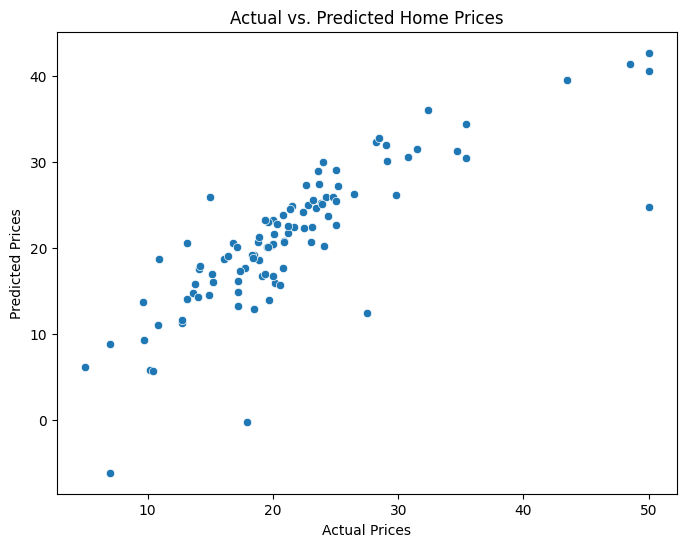

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Home Prices")
plt.show()


### Analysis of the Scatter Plot (Actual vs. Predicted Prices)
This plot compares the actual home prices (x-axis) with the predicted prices (y-axis) from our linear regression model.

#### Observations:
- Strong positive correlation – The points generally follow a diagonal trend, indicating our model captures the overall pattern well.
- Some spread – There is some deviation from the perfect diagonal line (y = x), meaning our model has some errors.
- Outliers – A few points are significantly off, particularly some predicted values that are much lower or higher than expected.

## 9. Residual Plot to check biasness

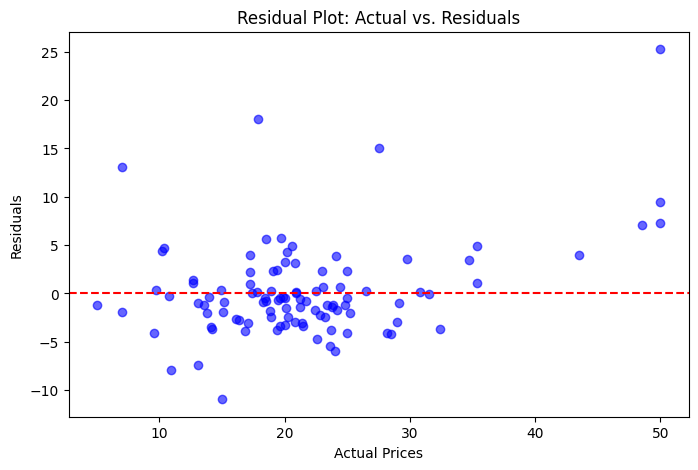

In [11]:
# Calculating residuals
residuals = y_test - y_pred 

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.5) 
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot: Actual vs. Residuals")
plt.show()


Scattered Residuals Around Zero – This suggests that the linear regression model captures the general trend well.

## Polynomial Regression: Next Steps
Polynomial regression is an extension of linear regression that captures non-linearity by adding polynomial terms to the model.

#### We'll follow these steps:
- Step 1: Transform features by adding polynomial terms.
- Step 2: Fit the model using polynomial regression.
- Step 3: Evaluate the model using MSE, RMSE, and R2
- Step 4: Visualize actual vs. predicted prices and residuals.

## Step 1: Transforming features by adding polynomial terms


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Defining polynomial degree 
degree = 2

#Creating polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

#Creating pipeline:Polynomial Transformation + linear regression
model = make_pipeline(poly_features, LinearRegression())

## Step 2: Fit the model using Polynomial Regression and Predicting

In [29]:
#Training/fitting the model
model.fit(X_train, y_train)

#Predicting the model
y_pred_poly = model.predict(X_test)

## Step 3: Evaluating the model using MSE, RMSE, and R2

In [30]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree= {degree}) Results:")
print(f"Mean Square Error (MSE): {mse_poly:.2f}")
print(f"Root Mean Square (RMSE): {rmse_poly:.2f}")
print(f"R2 Score: {r2_poly:.2f}")

Polynomial Regression (Degree= 2) Results:
Mean Square Error (MSE): 14.26
Root Mean Square (RMSE): 3.78
R2 Score: 0.81


Comparing this to your Linear Regression results:
- MSE dropped from 24.29 → 14.26 (lower is better )
- RMSE dropped from 4.93 → 3.78 (lower is better )
- R2 increased from 0.67 → 0.81 (closer to 1 is better )
- This suggests that Polynomial Regression (Degree = 2) fits the data better than simple linear regression! 

## Step 4: Visualizing Actual vs Predicted Prices

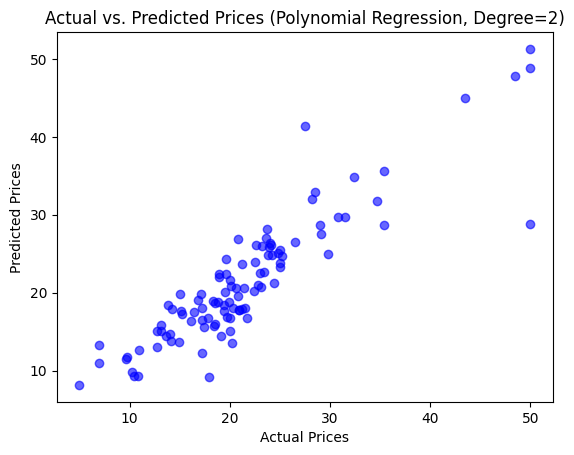

In [23]:
# Plot Actual vs. Predicted Prices
plt.scatter(y_test, y_pred_poly, color="blue", alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs. Predicted Prices (Polynomial Regression, Degree={degree})")
plt.show()

## Step 5: Visualizing the residual

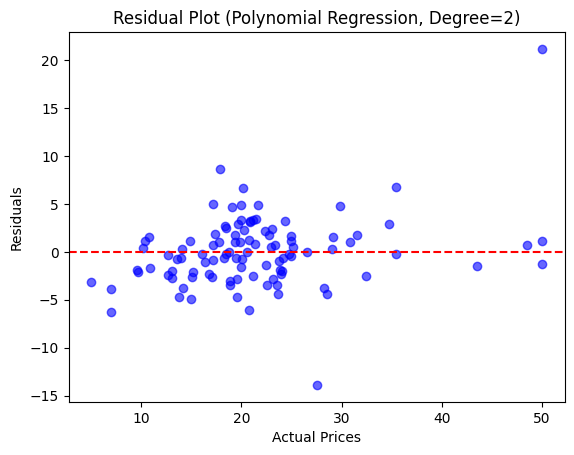

In [24]:
# Ploting Residuals
residuals_poly = y_test - y_pred_poly
plt.scatter(y_test, residuals_poly, color="blue", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1.5)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title(f"Residual Plot (Polynomial Regression, Degree={degree})")
plt.show()

 The residuals look more centered around zero, indicating that the polynomial model is capturing some non-linearity in the data.

## Training polynomial model

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define polynomial degree (adjustable)
degree = 2  

# Create a pipeline: Polynomial Transformation + Linear Regression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model on the training set
model.fit(X_train, y_train)

# Transform the features for evaluation
X_train_poly = PolynomialFeatures(degree).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree).fit_transform(X_test)


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Define polynomial transformation and model in a pipeline
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model on transformed training data
model.fit(X_train, y_train)

# Predict using the trained model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


## Ridge and Lasso Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test_poly)        # Transform test data (no fit!)

# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train)

# Apply Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_train_ridge_pred = ridge_model.predict(X_train_scaled)
y_test_ridge_pred = ridge_model.predict(X_test_scaled)

y_train_lasso_pred = lasso_model.predict(X_train_scaled)
y_test_lasso_pred = lasso_model.predict(X_test_scaled)

# Computing Metrics
def print_model_performance(model_name, y_train, y_train_pred, y_test, y_test_pred):
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\n{model_name} Regression Results:")
    print(f"Training Set - MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")
    print(f"Test Set - MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

# Printing Results
print_model_performance("Ridge", y_train, y_train_ridge_pred, y_test, y_test_ridge_pred)
print_model_performance("Lasso", y_train, y_train_lasso_pred, y_test, y_test_lasso_pred)



Ridge Regression Results:
Training Set - MSE: 6.98, RMSE: 2.64, R²: 0.92
Test Set - MSE: 11.21, RMSE: 3.35, R²: 0.85

Lasso Regression Results:
Training Set - MSE: 13.84, RMSE: 3.72, R²: 0.84
Test Set - MSE: 15.56, RMSE: 3.94, R²: 0.79


### Analysis of Ridge vs. Lasso Results
#### Ridge Regression Performance
- Training Set: R² = 0.92 (High accuracy, low error)
- Test Set: R² = 0.85 (Slight drop but still good)
- Ridge has reduced overfitting compared to polynomial regression!
#### Lasso Regression Performance
- Training Set: R² = 0.84 (Lower than Ridge)
- Test Set: R² = 0.79 (Higher error than Ridge)
- Lasso might be underfitting slightly, possibly too aggressive in feature selection.

### Key Observations
#### 1. Linear Regression:
- Lowest R² (0.67) → Doesn't capture complex relationships well.
- High MSE/RMSE → Model has high errors.
#### 2️. Polynomial Regression (Degree = 2):
- Improved R² (0.81) → Captures non-linearity.
- But... Potential overfitting? Training/Test scores are close, but we need higher-degree tests.
#### 3️. Ridge Regression:
- Best Training Score (R² = 0.92) and Good Generalization (Test R² = 0.85).
- Regularization reduced overfitting.
#### 4️. Lasso Regression:
- Feature selection may have led to slightly worse performance (Test R² = 0.79).
- Higher test error than Ridge → Underfitting risk.
